<a href="https://www.kaggle.com/code/arnabmukherjee853/pokemon-model?scriptVersionId=193112964" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-data/Pokemon.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, confusion_matrix , ConfusionMatrixDisplay
import tensorflow
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
%matplotlib inline

2024-08-18 19:37:50.729005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 19:37:50.729158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 19:37:50.890969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df=pd.read_csv('/kaggle/input/pokemon-data/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
df.fillna(df['Type 2'].mode()[0],inplace=True)
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [7]:
df.drop(columns=['#','Name'],inplace=True)
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,Flying,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


<Axes: ylabel='Type 1'>

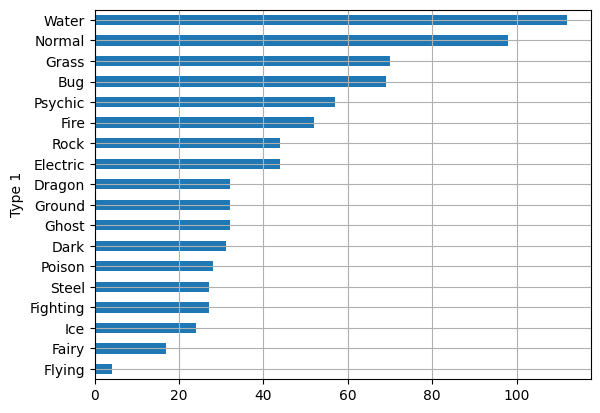

In [8]:
df['Type 1'].value_counts().sort_values(ascending=True).plot(kind='barh',grid=True)

<Axes: ylabel='Type 2'>

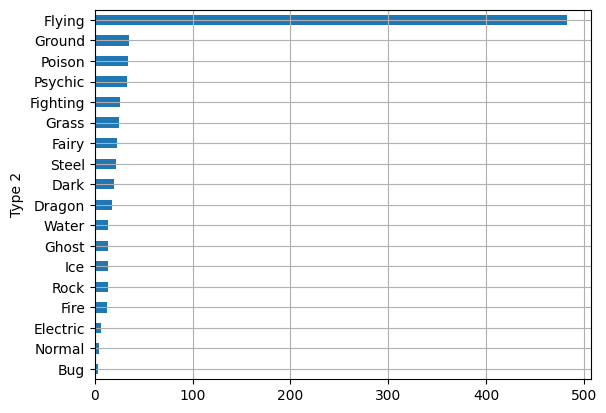

In [9]:
df['Type 2'].value_counts().sort_values(ascending=True).plot(kind='barh',grid=True)

<Axes: ylabel='count'>

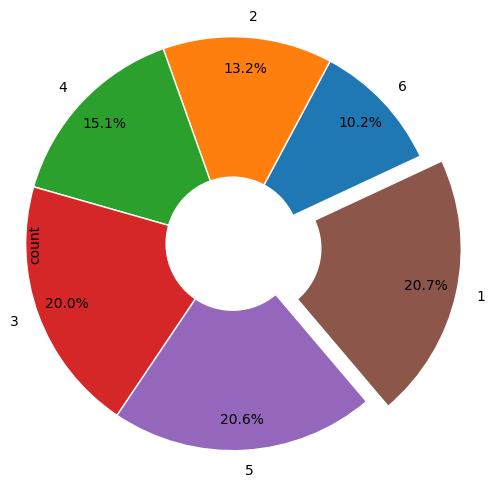

In [10]:
df.Generation.value_counts().sort_values(ascending=True).plot(kind='pie',
                                 autopct='%1.1f%%',
                                 wedgeprops=dict(edgecolor='white',width=0.95),
                                 pctdistance=0.85,
                                 startangle=25,
                                 radius=1.4,
                                 explode=[0,0,0,0,0,0.15])

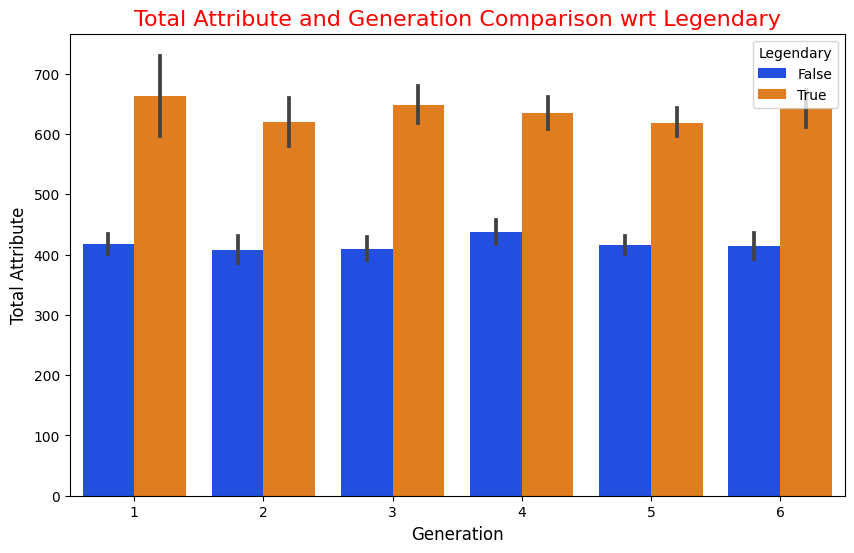

In [11]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df,y=df['Total'],x=df['Generation'],hue='Legendary',palette='bright')
ax.set_xlabel('Generation',fontsize=12)
ax.set_ylabel('Total Attribute',fontsize=12)
ax.set_title('Total Attribute and Generation Comparison wrt Legendary',fontsize=16,color='red')
plt.show()

In [12]:
df.Legendary.value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [13]:
df.Legendary=df.Legendary.map({True:1,False:0})
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,Flying,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [14]:
df.drop(columns=['Total'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      800 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 62.6+ KB


In [16]:
df.Generation=df.Generation.astype('object')
df.Legendary=df.Legendary.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      800 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    object
 9   Legendary   800 non-null    object
dtypes: int64(6), object(4)
memory usage: 62.6+ KB


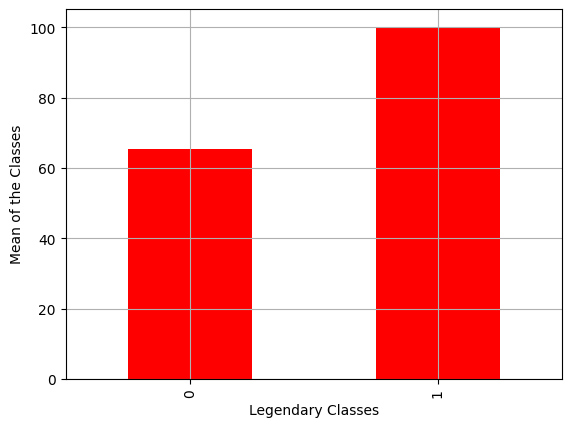

In [17]:
df.groupby('Legendary')['Speed'].mean().plot(kind='bar',color='red')
plt.xlabel('Legendary Classes', size=10,)
plt.ylabel('Mean of the Classes', size=10)
plt.grid(True)

In [18]:
df.groupby(['Legendary','Generation'])[['Speed','Defense']].agg(['mean','median']).reset_index()

Legendary Generation       Speed            Defense       
                               mean median        mean median
0          0          1   71.087500   70.0   70.175000   65.0
1          0          2   59.920792   60.0   72.118812   65.0
2          0          3   62.521127   60.0   69.901408   65.0
3          0          4   67.805556   68.0   75.074074   70.0
4          0          5   64.720000   61.5   70.486667   68.0
5          0          6   64.527027   60.0   74.013514   69.0
6          1          1  112.500000  115.0   89.166667   90.0
7          1          2  100.000000  100.0   99.000000   90.0
8          1          3  101.666667   97.5  107.222222  100.0
9          1          4  100.692308  100.0  103.538462  105.0
10         1          5  101.666667  101.0   90.733333   90.0
11         1          6   84.125000   87.5  101.375000  102.5

In [19]:
num_col=[]
df.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary'],
      dtype='object')

**Extracting Numerical and Categorical Variables**

In [20]:
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes!='object':
        num_col.append(i)
    else:
        cat_col.append(i)

print(num_col)
print(cat_col)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
['Type 1', 'Type 2', 'Generation', 'Legendary']


In [21]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


**Numeric data Visualization**

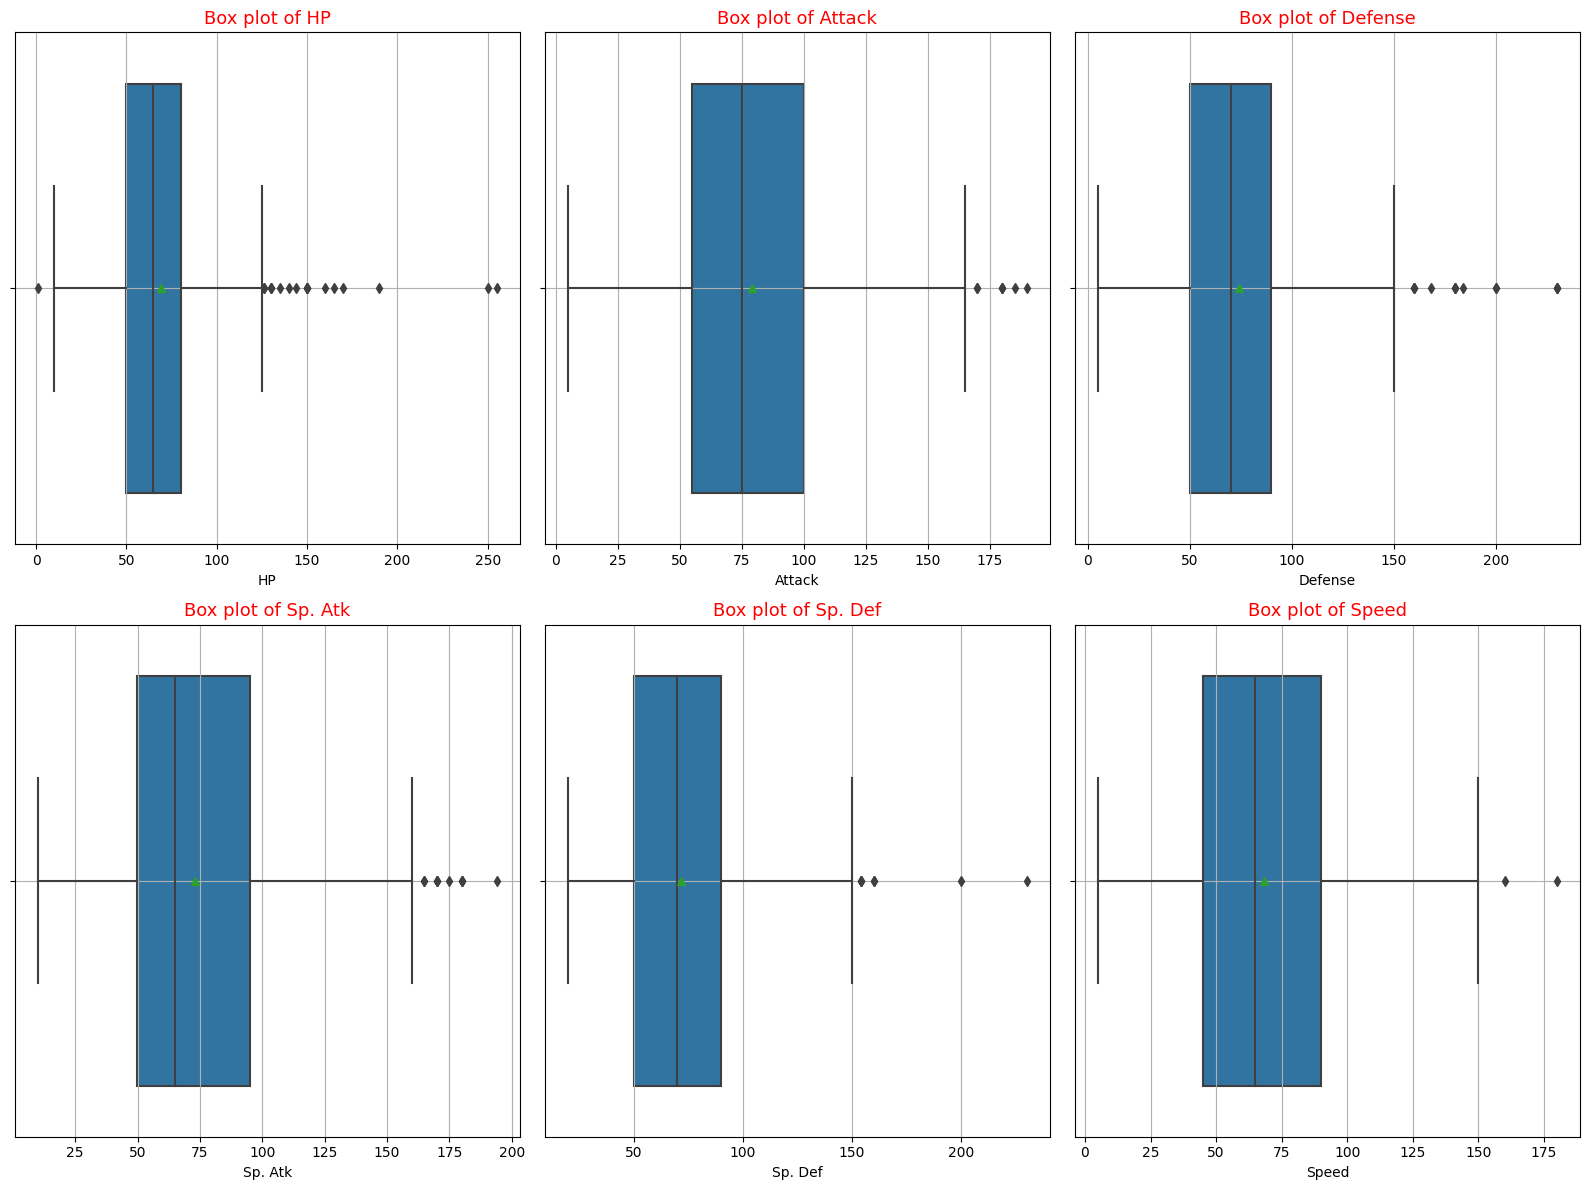

In [22]:
fig,axes = plt.subplots(2,3,figsize=(16,12))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.boxplot(data=df,x=num_col[i],ax=ax,showmeans=True)
    ax.set_xlabel(num_col[i])
    ax.set_title(f'Box plot of {num_col[i]}',size=13, color='red')
    plt.tight_layout()
    ax.grid(True)

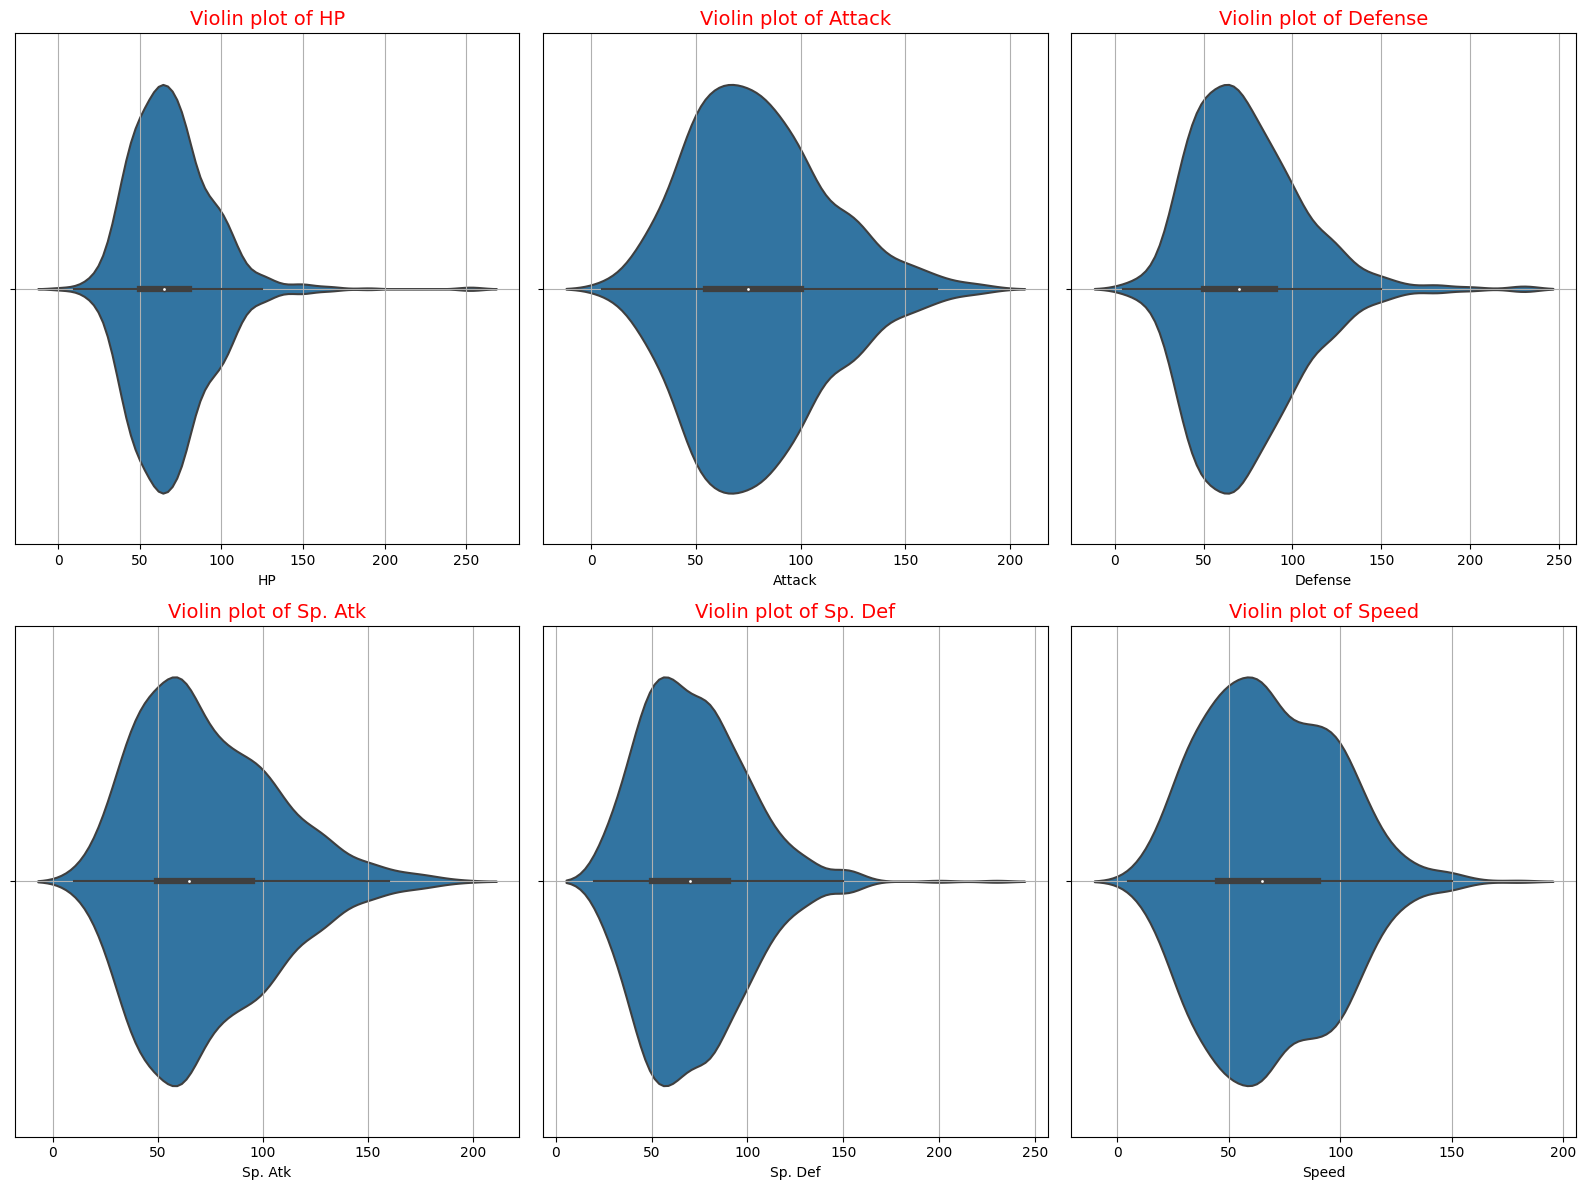

In [23]:
fig,axes = plt.subplots(2,3,figsize=(16,12))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.violinplot(data=df,x=num_col[i],ax=ax)
    ax.set_title(f'Violin plot of {num_col[i]}',size=14,color='red')
    ax.set_xlabel(num_col[i])
    ax.grid(True)
plt.tight_layout()

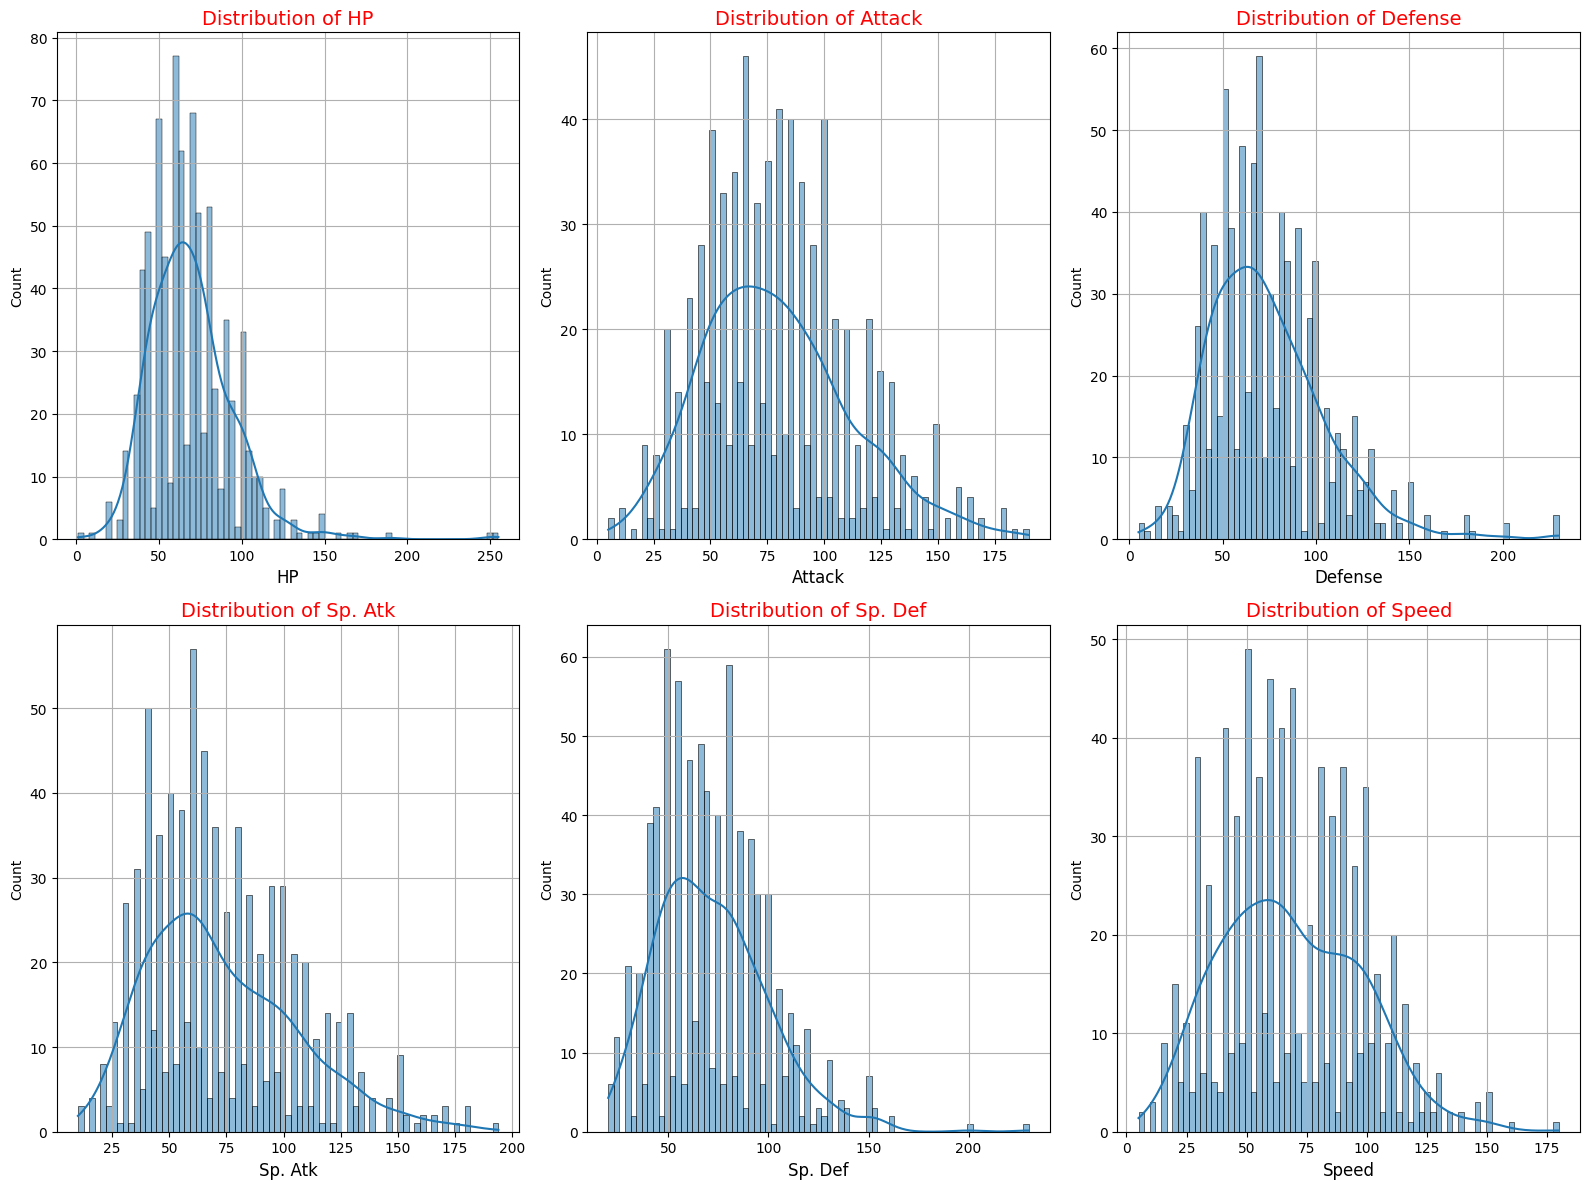

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig,axes=plt.subplots(2,3,figsize=(16,12))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.histplot(data=df,x=num_col[i], ax=ax, bins=75, kde=True)
    ax.set_title(f'Distribution of {num_col[i]}',size=14, color='red')
    ax.set_xlabel(num_col[i],size=12)
    ax.grid(True)
    plt.tight_layout()

In [25]:
df[num_col]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [26]:
len(num_col)

6

In [27]:
a=df.select_dtypes(include=np.number)
a

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [28]:
def OutliersHandling(df):
    Q1= df[num_col].quantile(0.25)
    Q3=df[num_col].quantile(0.75)
    IQR = Q3-Q1
    lower_b= Q1-1.5*IQR
    upper_b= Q3+1.5*IQR
    outliers_row = df[num_col].apply(lambda x:(x<lower_b[x.name])|(x>upper_b[x.name])).any(axis=1)
    cleaned_df=df[~outliers_row].copy()
    cleaned_df[cat_col]=df.loc[cleaned_df.index,cat_col]
    return cleaned_df

In [29]:
df=OutliersHandling(df)
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,0
1,Grass,Poison,60,62,63,80,80,60,1,0
2,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Fire,Flying,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
794,Dragon,Ground,108,100,121,81,95,95,6,1
795,Rock,Fairy,50,100,150,100,150,50,6,1
796,Rock,Fairy,50,160,110,160,110,110,6,1
797,Psychic,Ghost,80,110,60,150,130,70,6,1


**Using Boxplot**

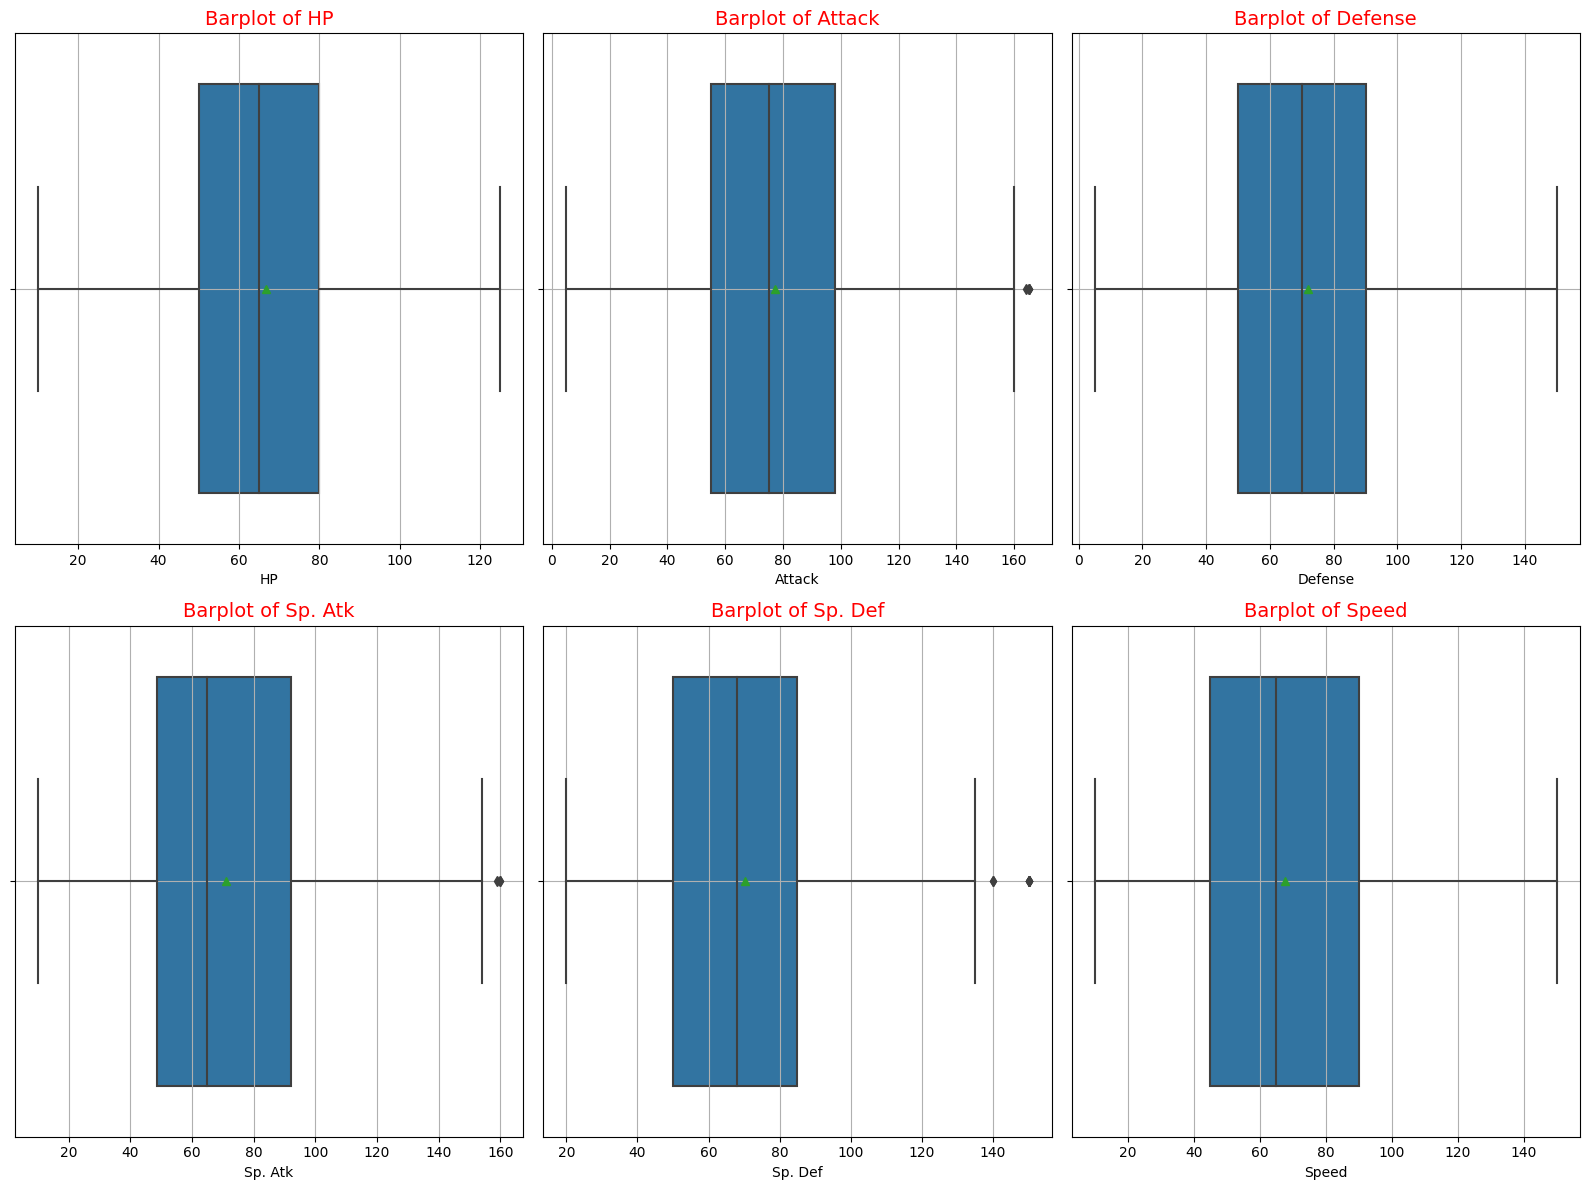

In [30]:
fig,axes=plt.subplots(2,3,figsize=(16,12))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.boxplot(data=df,x=num_col[i],ax=ax,showmeans=True)
    ax.set_xlabel(num_col[i])
    ax.set_title(f'Barplot of {num_col[i]}',color='red',size=14)
    ax.grid(True)
    plt.tight_layout()

**Using Violinplot**

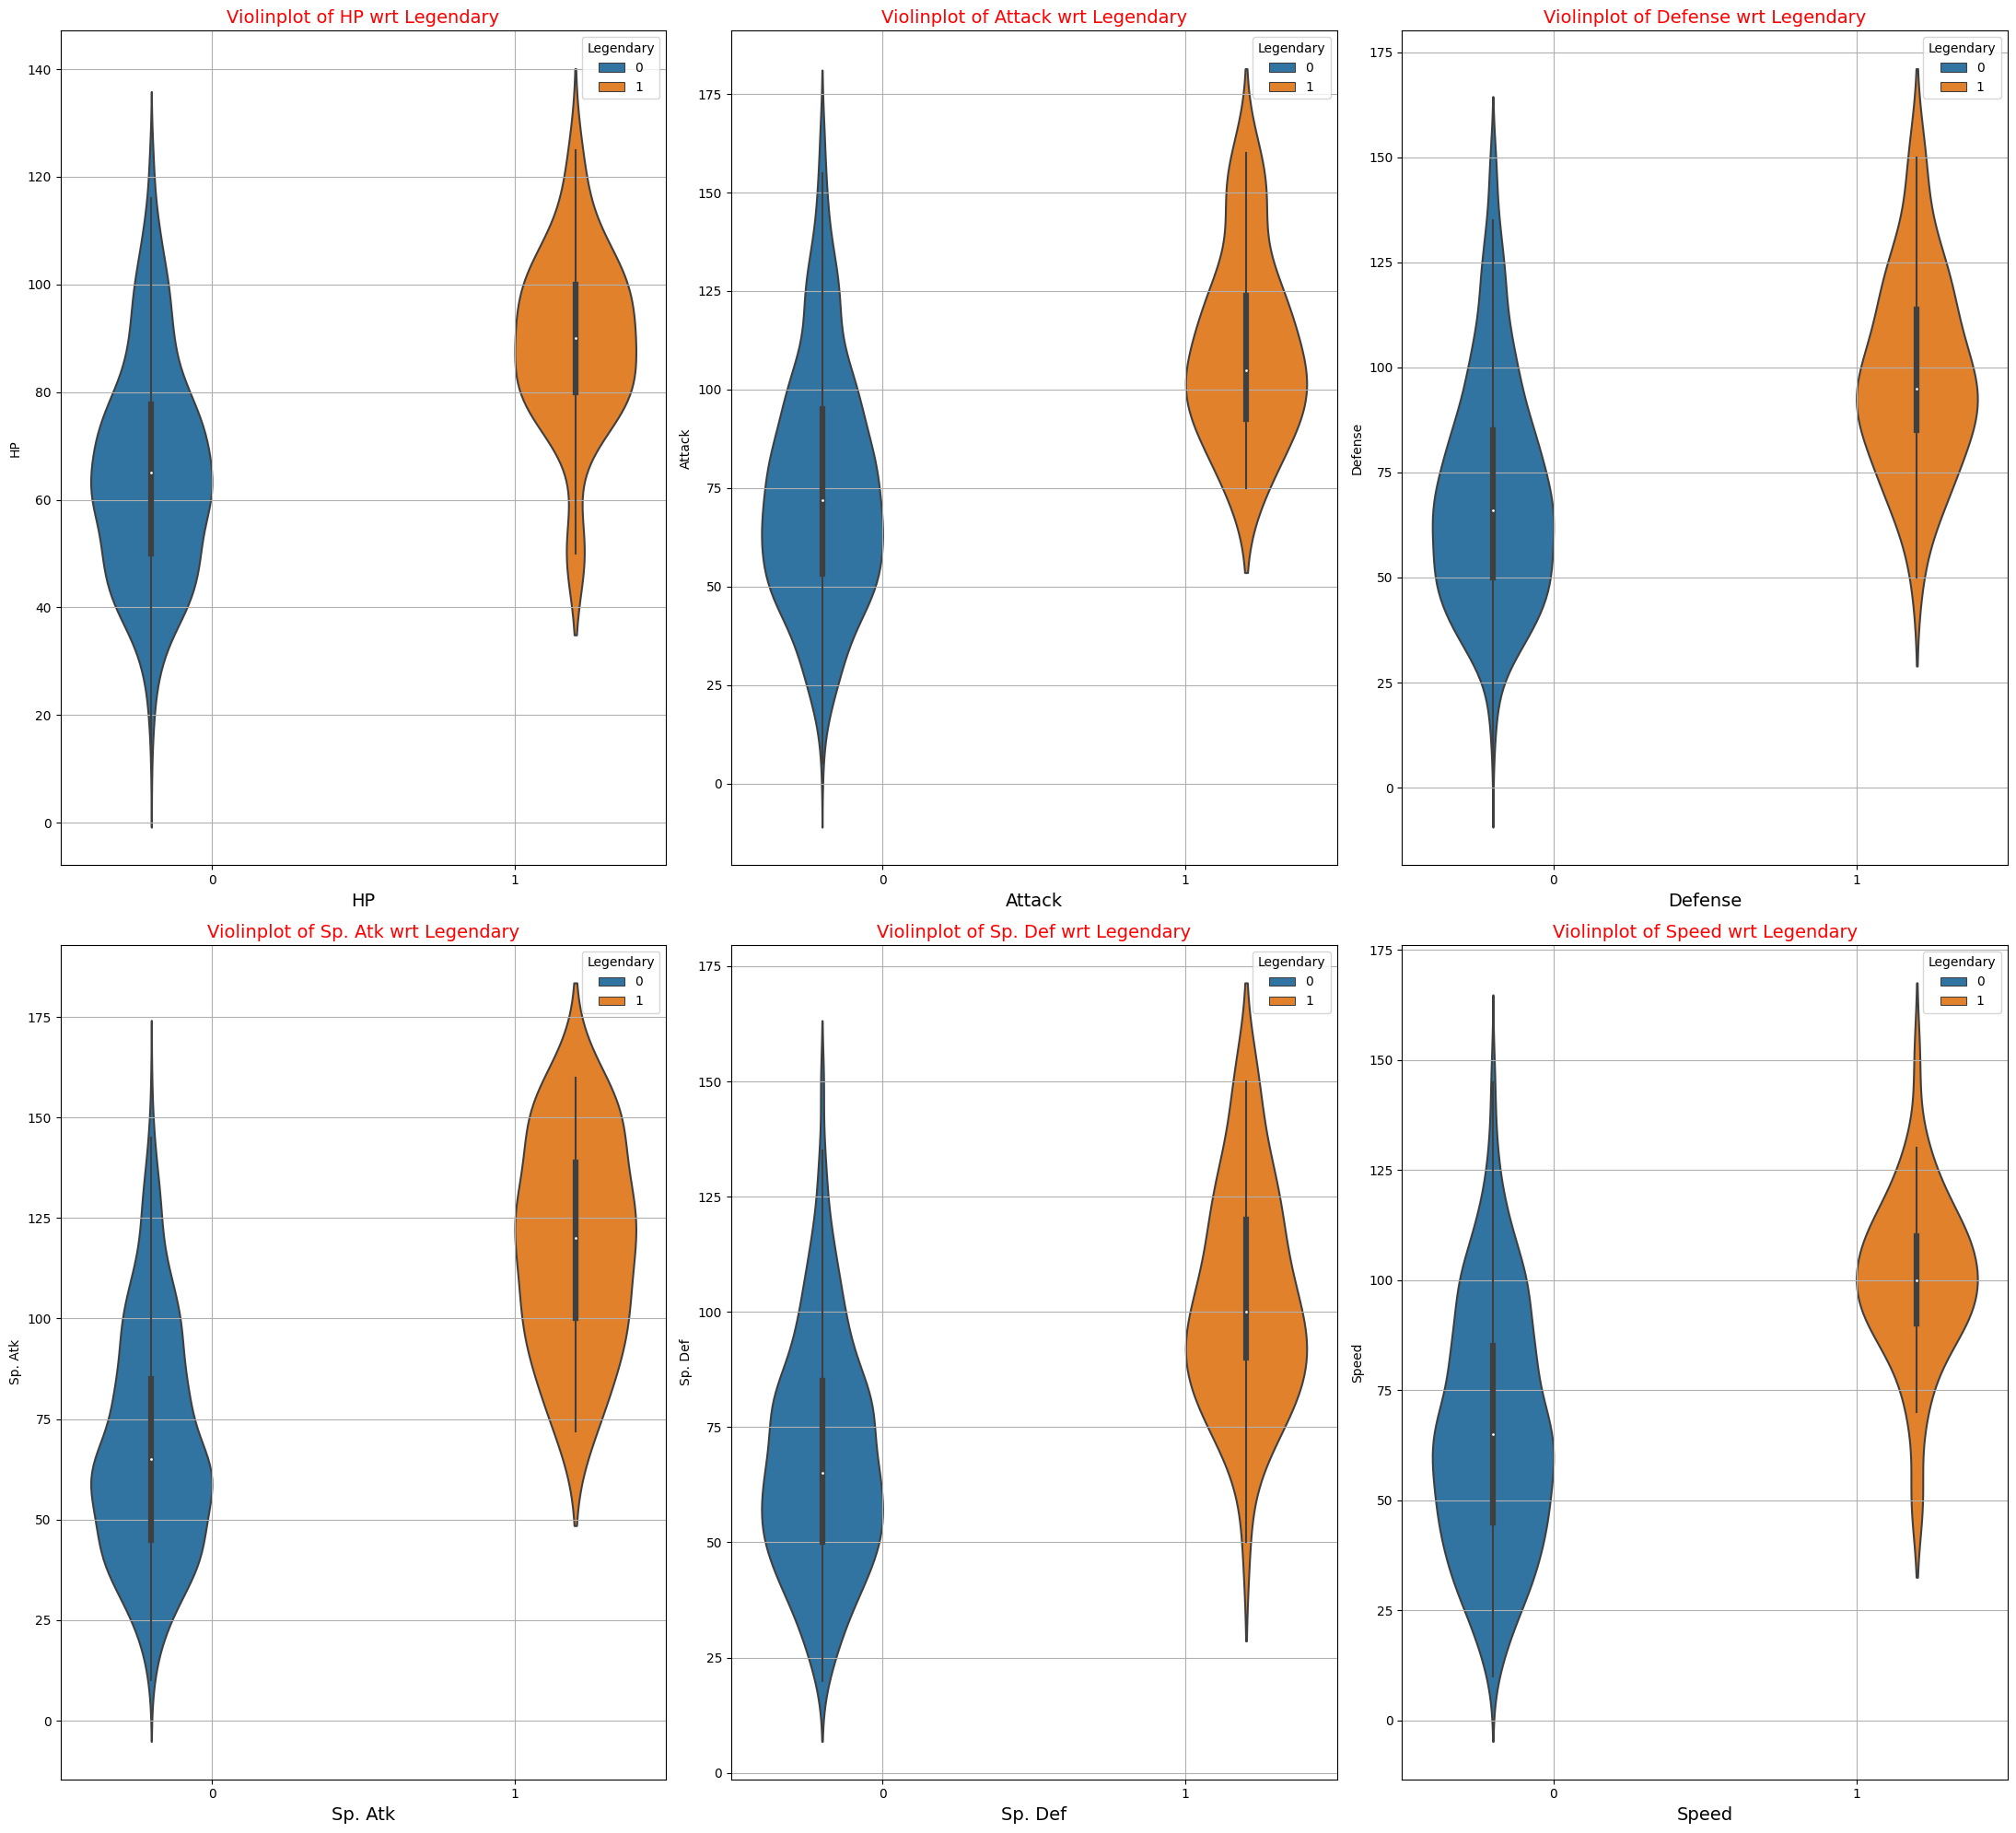

In [31]:
fig,axes = plt.subplots(2,3,figsize=(22,20))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.violinplot(data=df,y=num_col[i],ax=ax,x='Legendary',orient='v',hue='Legendary')
    ax.legend(title='Legendary',loc='best')
    ax.set_title(f'Violinplot of {num_col[i]} wrt Legendary',size=14,color='red')
    ax.set_xlabel(num_col[i],size=14)
    ax.grid(True)
    plt.tight_layout()

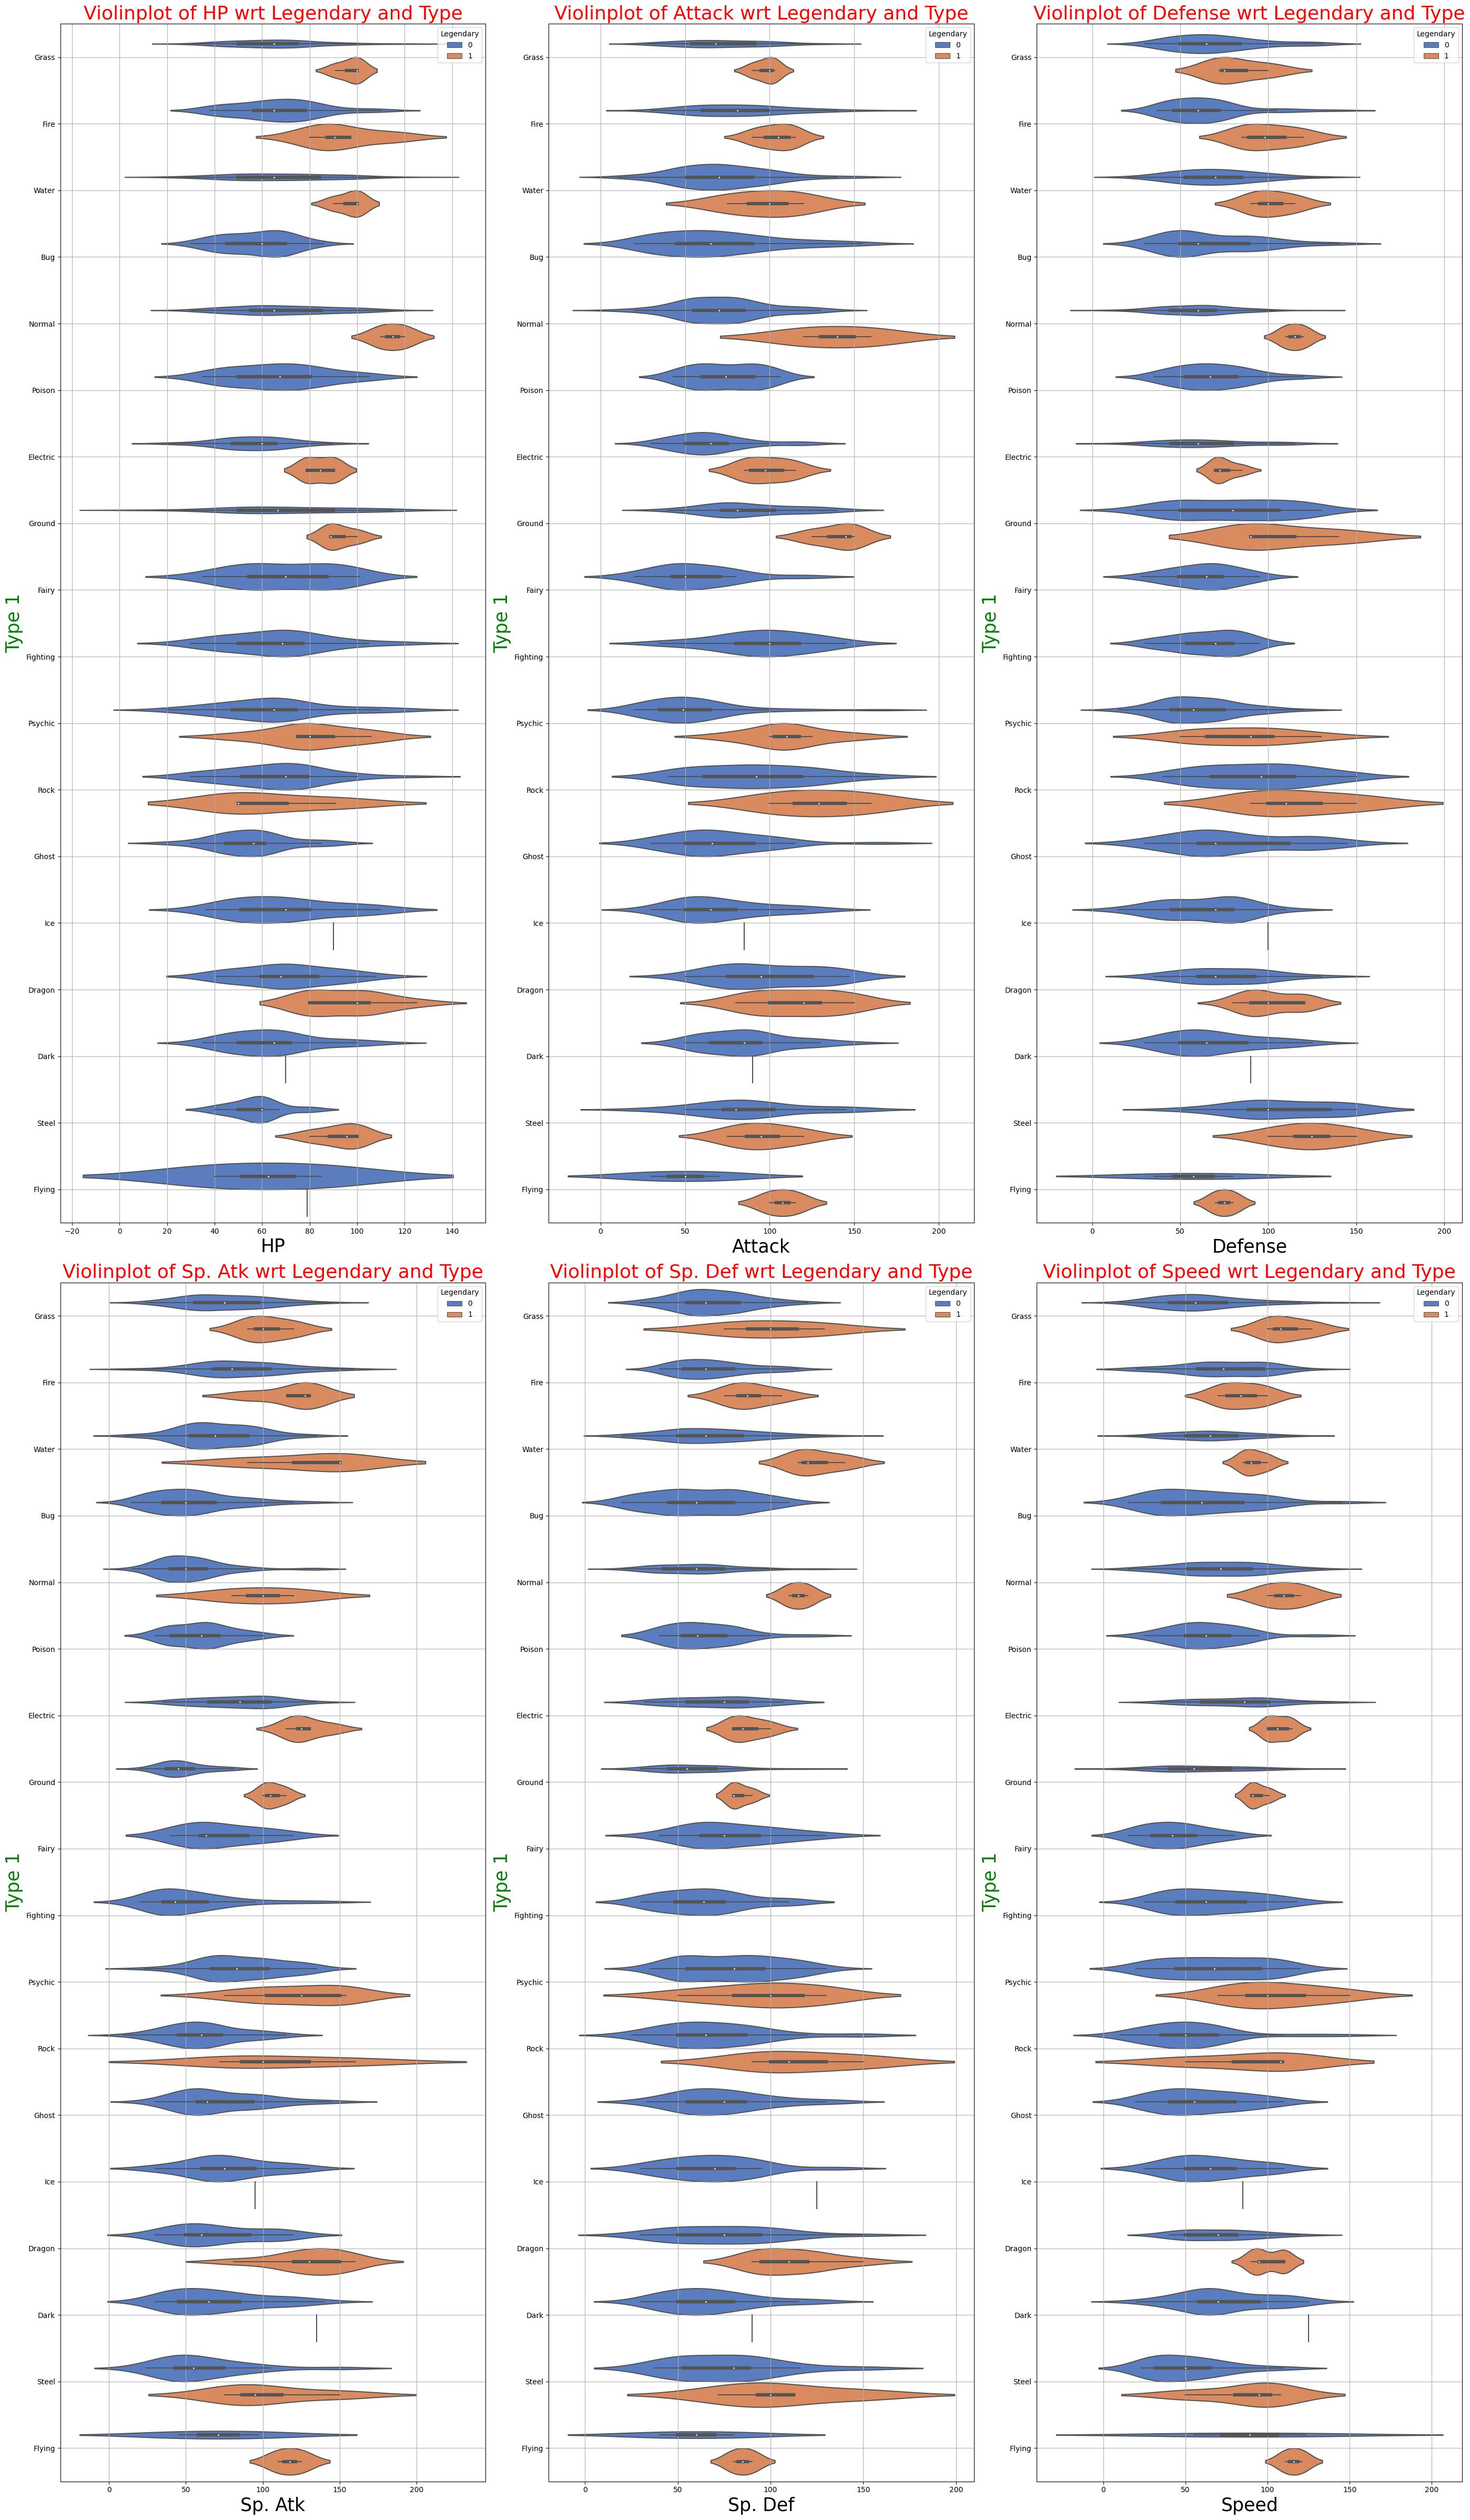

In [32]:
fig,axes = plt.subplots(2,3,figsize=(28,48))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.violinplot(data=df,x=num_col[i],ax=ax,y='Type 1',orient='h',hue='Legendary',palette='muted')
    ax.legend(title='Legendary',loc='best')
    ax.set_title(f'Violinplot of {num_col[i]} wrt Legendary and Type',size=26,color='red')
    ax.set_xlabel(num_col[i],size=25)
    ax.set_ylabel('Type 1', fontsize=25,color='green')
    ax.grid(True)
    plt.tight_layout()

**Using Histogram**

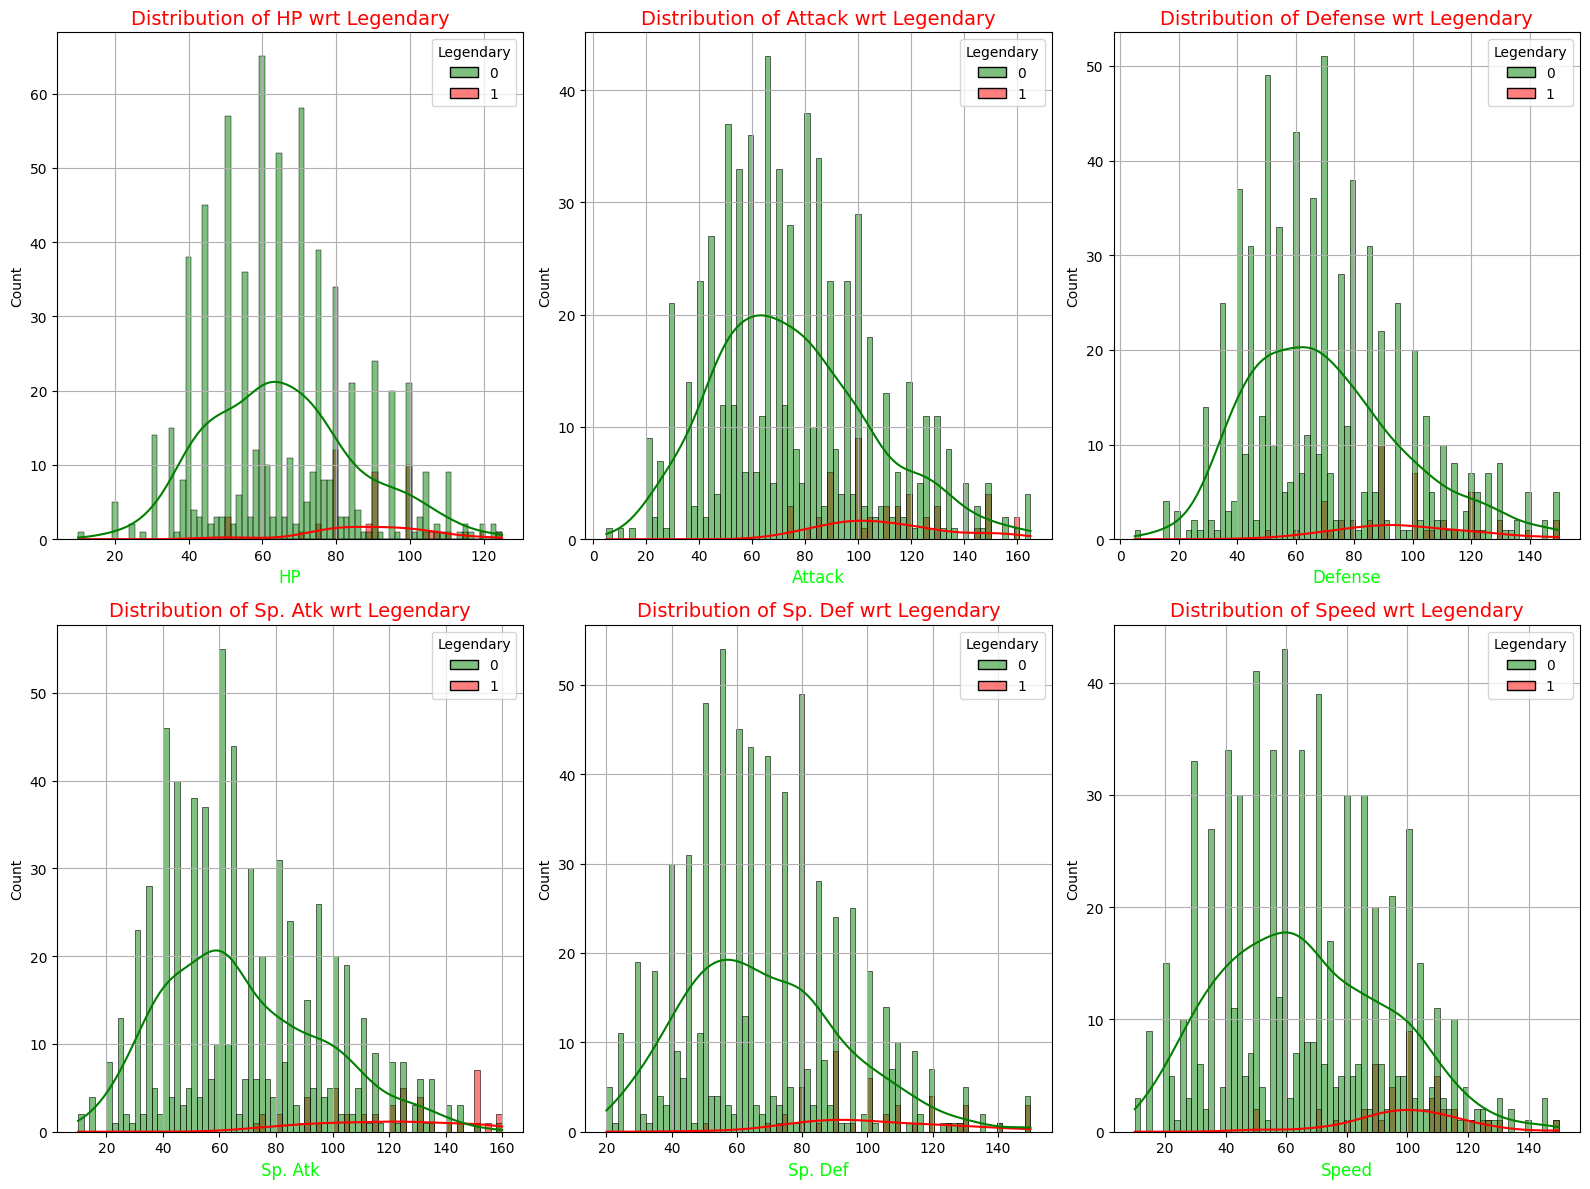

In [33]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig,axes=plt.subplots(2,3,figsize=(16,12))
for i,ax in enumerate(axes.flatten()):
    if i>=len(num_col):
        break
    sns.histplot(data=df,x=num_col[i], ax=ax, bins=75, kde=True, hue='Legendary',palette=['green','red'])
    ax.set_title(f'Distribution of {num_col[i]} wrt Legendary',size=14, color='red')
    ax.set_xlabel(num_col[i],size=12,color='lime')
    ax.grid(True)
    plt.tight_layout()

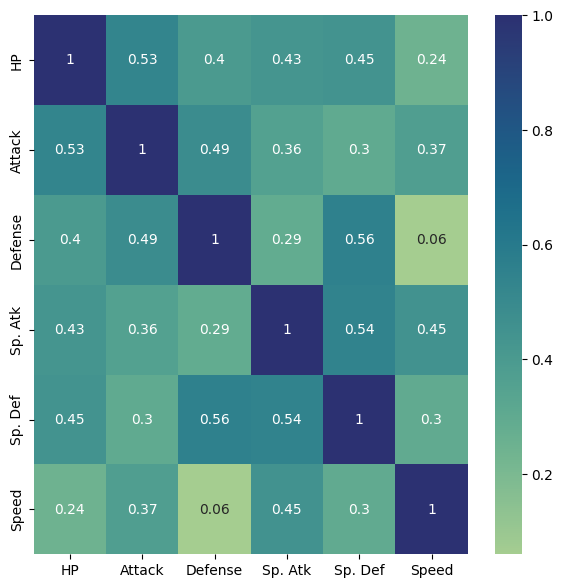

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(df[num_col].corr(),annot=True,cmap='crest')
plt.show()

In [35]:
df[num_col].min()

HP         10
Attack      5
Defense     5
Sp. Atk    10
Sp. Def    20
Speed      10
dtype: int64

In [36]:
df.head(2)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,0
1,Grass,Poison,60,62,63,80,80,60,1,0


**Comparison between Box-Cox Transformation/StandardScaler/MinMaxScaler in numerical features.**

In [37]:
boxcox_df=df.copy()
sc_df=df.copy()
mms_df=df.copy()

In [38]:
boxcox_df[num_col].head(1)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45


In [39]:
for col in num_col:
    boxcox_df[col],_=stats.boxcox(boxcox_df[col])
boxcox_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,14.900381,14.025189,10.595640,10.652989,10.977911,16.294238,1,0
1,Grass,Poison,18.049640,16.254600,12.131864,11.781422,12.162570,19.903677,1,0
2,Grass,Poison,21.798089,19.315641,14.029817,13.102038,13.552387,24.242696,1,0
3,Grass,Poison,21.798089,21.798684,17.180097,14.381248,14.785473,24.242696,1,0
4,Fire,Flying,13.526689,14.560729,9.863294,10.242151,9.617313,21.031865,1,0


In [40]:
sc=StandardScaler()
sc_df[num_col]=sc.fit_transform(sc_df[num_col])
sc_df.head(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,-1.052842,-0.928567,-0.837245,-0.201441,-0.204518,-0.808368,1,0


In [41]:
mms=MinMaxScaler()
mms_df[num_col]=mms.fit_transform(mms_df[num_col])
mms_df.head(1)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,0.304348,0.275,0.303448,0.366667,0.346154,0.25,1,0


**Comparison of Normalisation, Standardisation and Power-Transform in all numeric features**

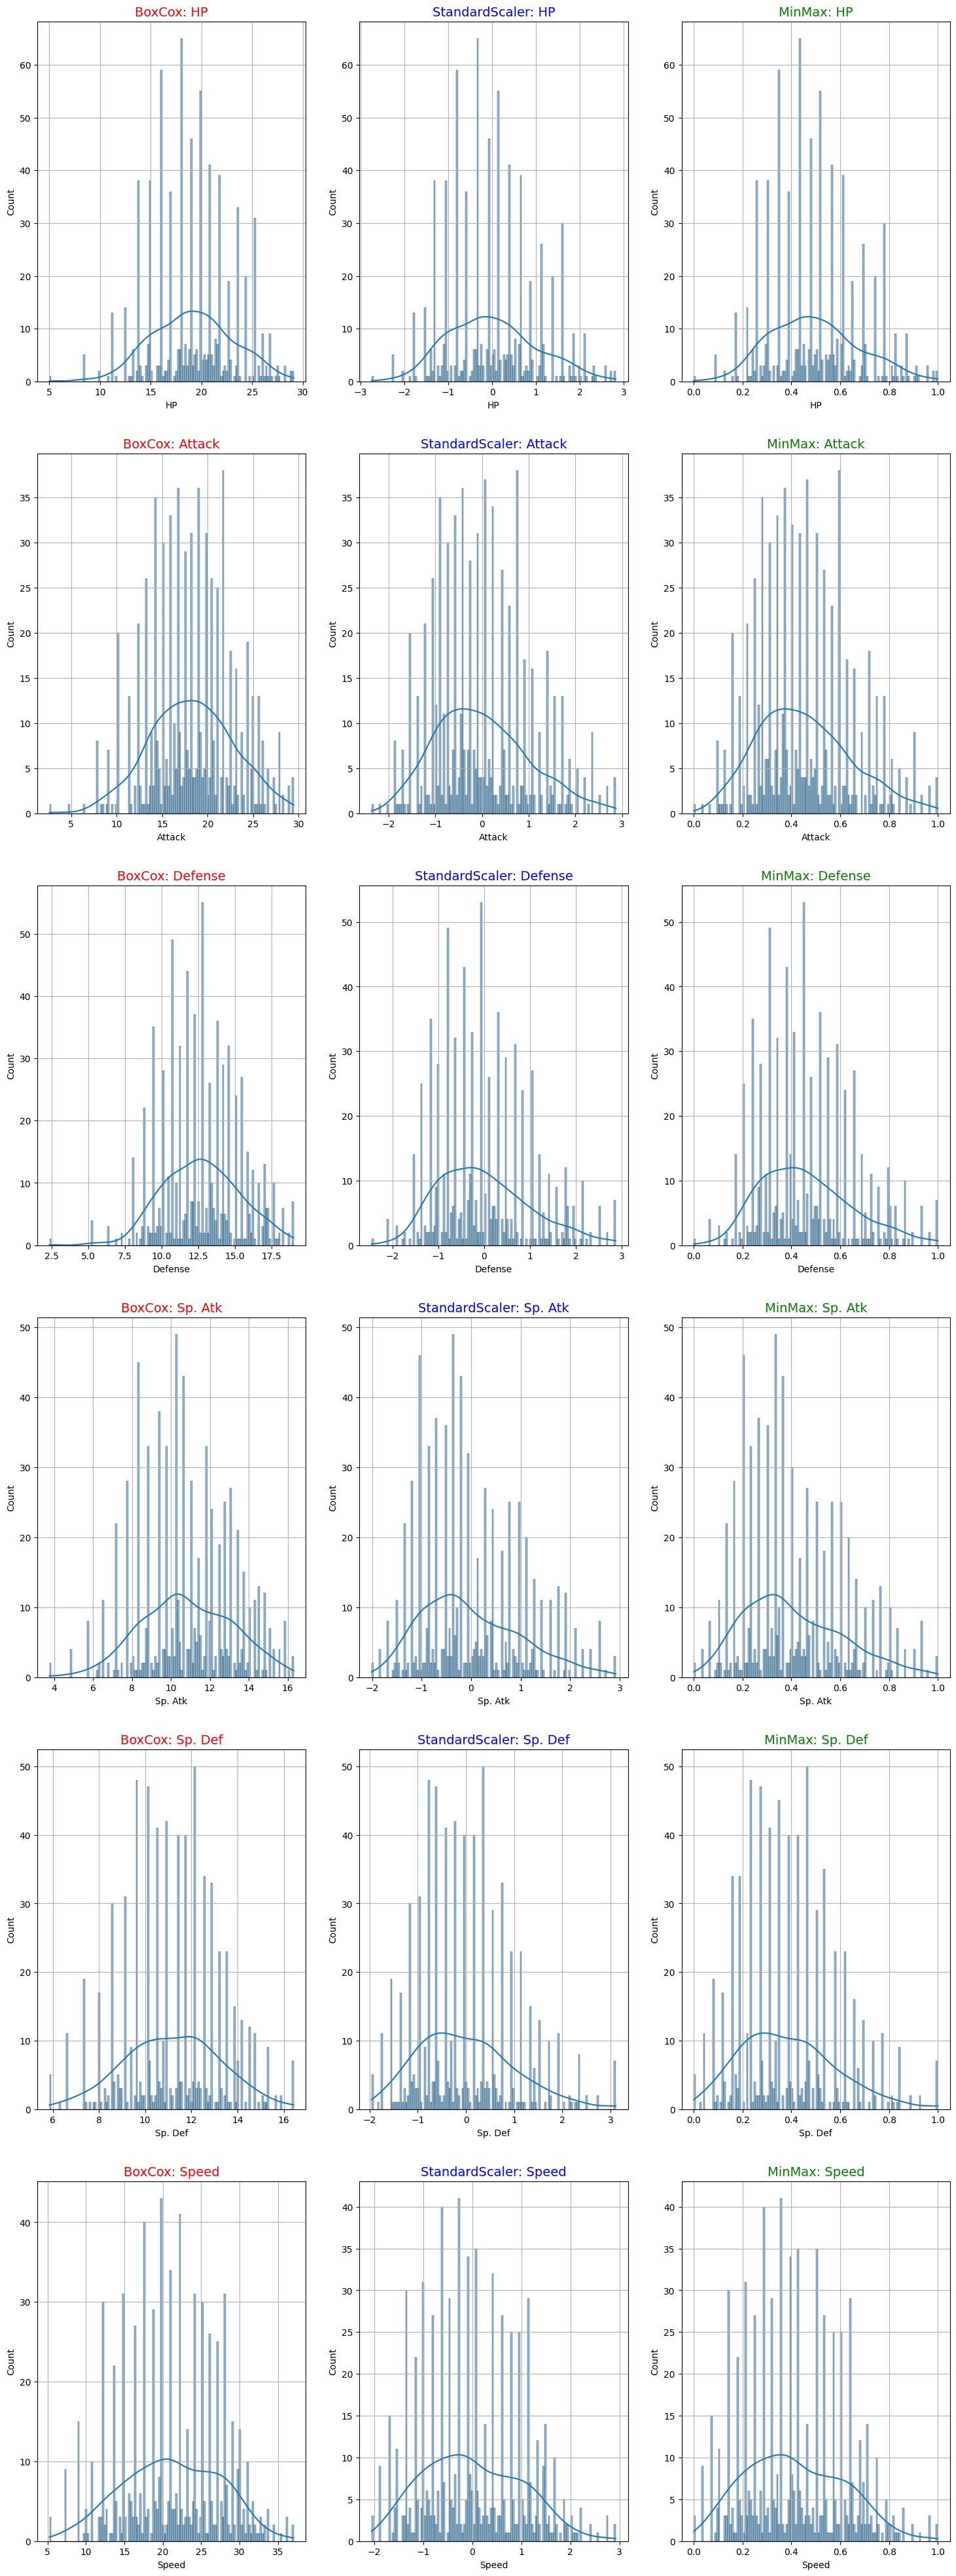

In [42]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig,axes = plt.subplots(6,3,figsize=(18,50))
ax_flat=axes.flatten()
for i,col in enumerate(num_col):
    ax_bc=ax_flat[i*3]
    ax_sc=ax_flat[i*3+1]
    ax_mns=ax_flat[i*3+2]
    sns.histplot(data=boxcox_df,x=col,bins=130,kde=True,ax=ax_bc)
    ax_bc.set_title(f'BoxCox: {col}',size=14,color='red')
    ax_bc.grid(True)
    sns.histplot(data=sc_df,x=col,bins=130,kde=True,ax=ax_sc)
    ax_sc.set_title(f'StandardScaler: {col}',size=14,color='blue')
    ax_sc.grid(True)
    sns.histplot(data=mms_df,x=col,bins=130,kde=True,ax=ax_mns)
    ax_mns.set_title(f'MinMax: {col}',size=14,color='green')
    ax_mns.grid(True)
    

**From the nature of transformed columns it can be assumed that Box-Cox Transform works well**

In [43]:
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,0
1,Grass,Poison,60,62,63,80,80,60,1,0
2,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Fire,Flying,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
794,Dragon,Ground,108,100,121,81,95,95,6,1
795,Rock,Fairy,50,100,150,100,150,50,6,1
796,Rock,Fairy,50,160,110,160,110,110,6,1
797,Psychic,Ghost,80,110,60,150,130,70,6,1


In [44]:
X = df.iloc[:,0:-1]
y = df.Legendary.astype('int')
print(X.shape)
print(y.shape)

(748, 9)
(748,)


In [45]:
X.columns

Index(['Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation'],
      dtype='object')

****Making Pipelines****

In [46]:
pipeline_num = Pipeline(
steps=[('BoxCox',PowerTransformer(standardize=True,method='box-cox'))])

pipeline_nominal = Pipeline(
steps=[('OneHot',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

pipeline_ordinal = Pipeline(
steps=[('OrdinalEnc',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))])

pipeline_cat = Pipeline(
steps=[('Union',
       FeatureUnion(transformer_list=[('Nominal',
                                        ColumnTransformer([('OneHot',
                                                            OneHotEncoder(sparse_output=False,handle_unknown='ignore'),
                                                            ['Type 1','Type 2'])],remainder='drop')),
                                     ('Ordinal',
                                      ColumnTransformer([('OrdinalEnc',
                                                          OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),
                                                          ['Generation'])],
                                      remainder='drop'))]))])

CT = make_column_transformer(
(pipeline_cat,['Type 1','Type 2','Generation']),
(pipeline_num,['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']),
remainder='drop')

CT.set_output(transform='pandas')

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('Union',
                                                  FeatureUnion(transformer_list=[('Nominal',
                                                                                  ColumnTransformer(transformers=[('OneHot',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse_output=False),
                                                                                                                   ['Type '
                                                                                                                    '1',
                                                                                                                    'Type '
                                                                                                                    '2'])])),
                                                                                 ('Ordinal',
                                                                                  ColumnTransformer(transformers=[('OrdinalEnc',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1),
                                                                                                                   ['Generation'])]))]))]),
                                 ['Type 1', 'Type 2', 'Generation']),
                                ('pipeline-2',
                                 Pipeline(steps=[('BoxCox',
                                                  PowerTransformer(method='box-cox'))]),
                                 ['HP', 'Attack', 'Defense', 'Sp. Atk',
                                  'Sp. Def', 'Speed'])])

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(635, 9)
(113, 9)
(635,)
(113,)


In [48]:
param_rs_gs_dt = {'model__criterion':['entropy','gini'],
            'model__max_depth': range(4,12),
            'model__splitter': ['best','random']}
param_rs_gs_knn = { 'model__n_neighbors': [i for i in range(3,28,2)],
                   'model__weights': ['uniform','distance'],
                   'model__metric': ['euclidean','manhattan','minkowski']} 

In [49]:
models={'Logistic Regression':Pipeline([('transformer',CT),('model',LogisticRegression())]),
        'Decision_Tree_Classifier':Pipeline([('transformer',CT),('model',DecisionTreeClassifier(criterion = 'entropy',
                                                                                                splitter = 'best'))]),
        'Decision_Tree_Classifier_RSCV':RandomizedSearchCV(estimator = Pipeline([('transformer',CT),
                                                                                 ('model',DecisionTreeClassifier())]),
                                                           param_distributions = param_rs_gs_dt,
                                                           cv = 7,
                                                           random_state = 13,
                                                           n_iter = 15),
        'Decision_Tree_Classifier_GSCV':GridSearchCV(estimator= Pipeline([('transformer',CT),
                                                                          ('model', DecisionTreeClassifier())]),
                                                     param_grid = param_rs_gs_dt,
                                                     cv = 7),
        'Random_Forest_Classifier':Pipeline([('transformer',CT),
                                             ('model', RandomForestClassifier(criterion = 'entropy',
                                                                              n_estimators = 51))]),
        'K-Neighbors_Classifier': Pipeline([('transformer', CT),
                                            ('model', KNeighborsClassifier(n_neighbors = 15,
                                                                           algorithm = 'auto'))]),
        'K-Neighbors_Classifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),
                                                                             ('model', KNeighborsClassifier())]),
                                                         param_distributions = param_rs_gs_knn,
                                                         cv = 7,
                                                         random_state = 13),
        'K-Neighbors_classifier_GSCV':GridSearchCV(estimator = Pipeline([('transformer', CT),
                                                                         ('model', KNeighborsClassifier())]),
                                                   param_grid = param_rs_gs_knn,
                                                   cv = 7),
        'SVM': Pipeline([('transformer', CT),('model', SVC(kernel='poly', degree=2, probability = True))])
       }
models.items()

dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Union',
                                                                   FeatureUnion(transformer_list=[('Nominal',
                                                                                                   ColumnTransformer(transformers=[('OneHot',
                                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                                  sparse_output=False),
                                                                                                                                    ['Type '
                                                            

**Model Fitting and Summary**

Fitting model: Logistic Regression
Model Name:: Logistic Regression
Accuracy Score of Logistic Regression is 0.9469026548672567
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.67      0.29      0.40         7

    accuracy                           0.95       113
   macro avg       0.81      0.64      0.69       113
weighted avg       0.94      0.95      0.94       113

***************************************************************************************************************************************
***************************************************************************************************************************************
Fitting model: Decision_Tree_Classifier
Model Name:: Decision_Tree_Classifier
Accuracy Score of Decision_Tree_Classifier is 0.911504424778761
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.2

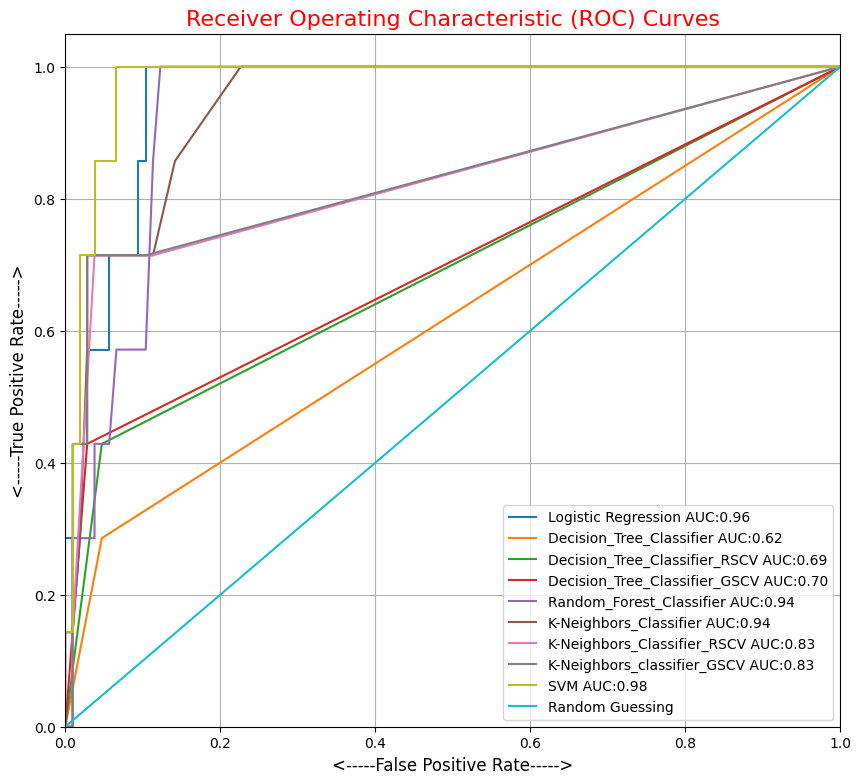

In [50]:
plt.figure(figsize=(10,9))
for model_name,model in models.items():
    print(f"Fitting model: {model_name}")
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(X_train,y_train)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
        
    else:
        best_model = model
        best_model.fit(X_train,y_train)
        
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:,1]
    
    fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f'{model_name} AUC:{roc_auc:.2f}')
    
    print(f'Model Name:: {model_name}')
    print(f'Accuracy Score of {model_name} is {accuracy_score(y_test,y_pred)}')
    print(classification_report(y_test,y_pred))
    print('*****'*27)
    print('*****'*27)
plt.plot([0,1],[0,1],label='Random Guessing')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('<-----False Positive Rate----->',fontsize=12)
plt.ylabel('<-----True Positive Rate----->',fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves',fontsize=16,color='red')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**Using Neutral Networks**

In [51]:
Transformed_data = CT.fit_transform(df)
X = Transformed_data
y=df.Legendary.astype('int')
print(y)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=.85,random_state=15)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

0      0
1      0
2      0
3      0
4      0
      ..
794    1
795    1
796    1
797    1
799    1
Name: Legendary, Length: 748, dtype: int64
(635, 43)
(113, 43)
(635,)
(113,)


In [52]:
model = Sequential([
    Input(shape=(43,)),
    Dense(150,activation='relu'),
    Dense(300,activation='leaky_relu'),
    Dense(650,activation='relu'),
    Dropout(.15),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 150)            │         6,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 650)            │       195,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 650)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           651 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,201 (969.54 KB)

 Trainable params: 248,201 (969.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
NN_Model = model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs=25)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8116 - loss: 0.3783 - val_accuracy: 0.9027 - val_loss: 0.1821
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9392 - loss: 0.1352 - val_accuracy: 0.9204 - val_loss: 0.1219
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9623 - loss: 0.0908 - val_accuracy: 0.9381 - val_loss: 0.1476
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9741 - loss: 0.0662 - val_accuracy: 0.9381 - val_loss: 0.1499
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.0429 - val_accuracy: 0.9204 - val_loss: 0.1896
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9381 - val_loss: 0.1821
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 0.9381 - val_loss: 0.2410
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.9292 - val_loss

In [54]:
print("Train Score",model.evaluate(Xtrain,ytrain))
print("Test Score",model.evaluate(Xtest,ytest))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.7903e-05 
Train Score [9.515001875115559e-05, 1.0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9554 - loss: 0.3223     
Test Score [0.4036834239959717, 0.9380530714988708]


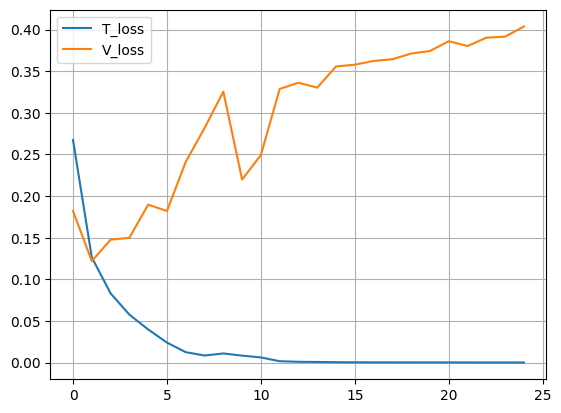

In [55]:
plt.plot(NN_Model.history['loss'], label='T_loss')
plt.plot(NN_Model.history['val_loss'], label='V_loss')
plt.legend()
plt.grid(True)

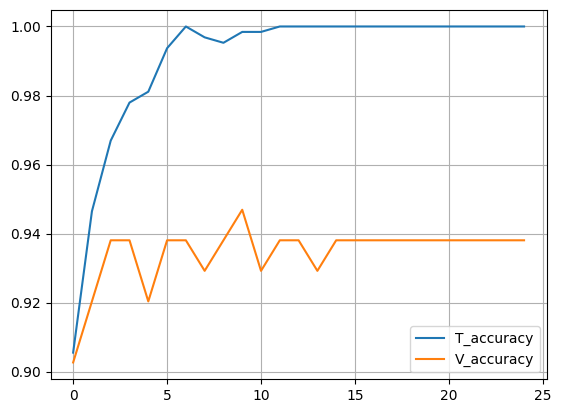

In [56]:
plt.plot(NN_Model.history['accuracy'], label='T_accuracy')
plt.plot(NN_Model.history['val_accuracy'], label='V_accuracy')
plt.legend()
plt.grid(True)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


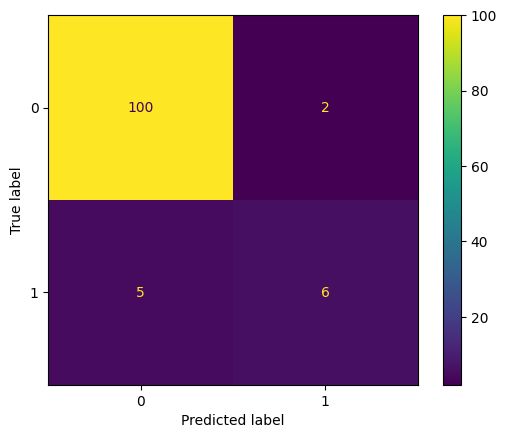

In [57]:
y_nn_probs = model.predict(Xtest)
y_pred = np.where(y_nn_probs>0.5,1,0)
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

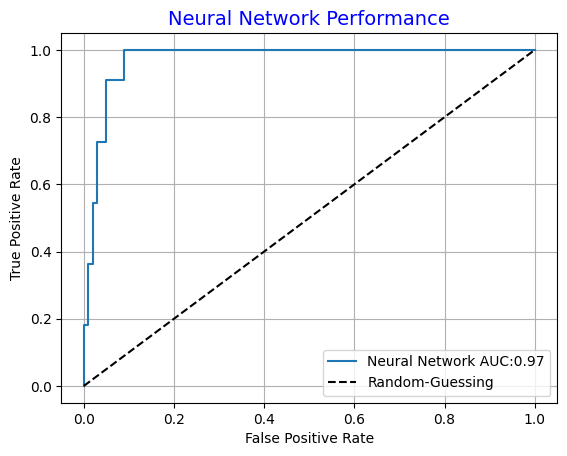

In [58]:
fpr,tpr,_ = roc_curve(ytest,y_nn_probs)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'Neural Network AUC:{roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--',label='Random-Guessing')
plt.title('Neural Network Performance',fontsize=14, color='blue')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)